# Problem Statement: How severe can an airplane accident be?

Flying has been the go-to mode of travel for years now; it is time-saving, affordable, and extremely convenient. According to the FAA, 2,781,971 passengers fly every day in the US, as in June 2019. Passengers reckon that flying is very safe, considering strict inspections are conducted and security measures are taken to avoid and/or mitigate any mishappenings. However, there remain a few chances of unfortunate incidents.

Imagine you have been hired by a leading airline. You are required to build Machine Learning models to anticipate and classify the severity of any airplane accident based on past incidents. With this, all airlines, even the entire aviation industry, can predict the severity of airplane accidents caused due to various factors and, correspondingly, have a plan of action to minimize the risk associated with them.
 

<b> Data: </b>
The dataset comprises 3 files: 

<b> Train.csv: </b> [10000 x 12 excluding the headers] contains Training data <br>
<b> Test.csv: </b> [2500 x 11 excluding the headers] contains Test data <br>
<b> sample_submission.csv: </b> contains a sample of the format in which the Results.csv needs to be <br>

<b> Data Description: </b> <br>

<b> Columns	                      Description  </b>  <br>
<b> Accident_ID </b>	          unique id assigned to each row <br>
<b> Accident_Type_Code </b>	      the type of accident (factor, not numeric) <br>
<b> Cabin_Temperature </b>	      the last recorded temperature before the incident, measured in degrees fahrenheit <br>
<b> Turbulence_In_gforces </b>	  the recorded/estimated turbulence experienced during the accident <br>
<b> Control_Metric </b>	          an estimation of how much control the pilot had during the incident given the factors at play <br>
<b> Total_Safety_Complaints </b>  number of complaints from mechanics prior to the accident <br>
<b> Days_Since_Inspection </b>	  how long the plane went without inspection before the incident <br>
<b> Safety_Score </b>	          a measure of how safe the plane was deemed to be <br>
<b> Violations </b>	              number of violations that the aircraft received during inspections <br>
<b> Severity </b>                 a description (4 level factor) on the severity of the crash <b> [Target] </b>

# Phase1: Model Building On Training Data

# Step1: Read Data

In [1]:
train = pd.read_csv("train.csv")
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [2]:
train.shape

(10000, 12)

In [3]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

## 1.1 Rearranging columns

In [4]:
train = train[['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 
               'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
               'Violations', 'Adverse_Weather_Metric', 'Accident_ID', 'Severity']]

## 1.2 De-duplicating dataset

In [5]:
# Removing duplicate rows based on "Accident_ID"

help(train.duplicated)


Help on method duplicated in module pandas.core.frame:

duplicated(subset=None, keep='first') method of pandas.core.frame.DataFrame instance
    Return boolean Series denoting duplicate rows, optionally only
    considering certain columns
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns
    keep : {'first', 'last', False}, default 'first'
        - ``first`` : Mark duplicates as ``True`` except for the
          first occurrence.
        - ``last`` : Mark duplicates as ``True`` except for the
          last occurrence.
        - False : Mark all duplicates as ``True``.
    
    Returns
    -------
    duplicated : Series



In [6]:
# Sorting by first name 
train.sort_values("Accident_ID", inplace = True) 
  
# Making a bool series 
bool_series = train["Accident_ID"].duplicated() 
  
# De-duplicating the data 
train_deduplicated = train[~bool_series] 

train_deduplicated.shape

(10000, 12)

<b> All the rows are unique. No duplcate records found </b>

## 1.3 Dropping Irrelevant Variables

In [7]:
train_deduplicated = train_deduplicated[['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 
               'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
               'Violations', 'Adverse_Weather_Metric', 'Severity']]

# Step2: Exploratory Data Analysis

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

## 2.1 Missing Data Analysis 

In [8]:
train_deduplicated.isnull().sum()

Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Severity                   0
dtype: int64

## 2.2 Data Type Analysis 

In [9]:
train_deduplicated.dtypes

Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Severity                    object
dtype: object

## 2.3 Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

<b> Continuous Variables:- </b> In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics such as Histogram and Bar plots: 

In [10]:
train_deduplicated.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378


### 2.3.1 Box Plot of CONTINUOUS variables 

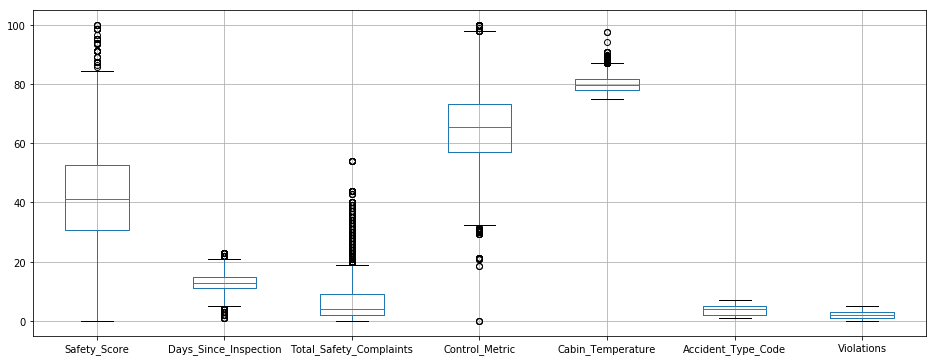

In [11]:
# "Accident_Type_Code" and "Severity" are a Categorical variable hence, removing it 
plt.figure(figsize=(16,6))
train_deduplicated.boxplot(column=['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 
                                   'Cabin_Temperature', 'Accident_Type_Code', 'Violations'])

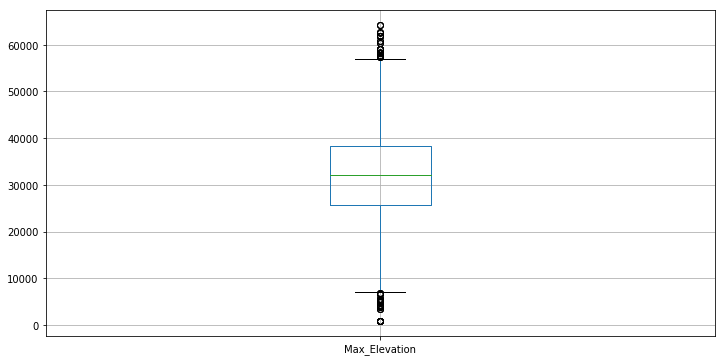

In [12]:
plt.figure(figsize=(12,6))
train_deduplicated.boxplot(column=['Max_Elevation'])

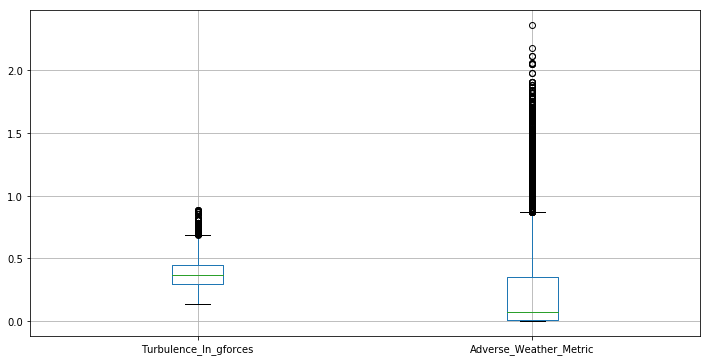

In [13]:
plt.figure(figsize=(12,6))
train_deduplicated.boxplot(column=['Turbulence_In_gforces', 'Adverse_Weather_Metric'])

<b> From the plots we can see that, there are lots of outliers in each varibale. </b>

### 2.3.2 Plot for Continuous variables

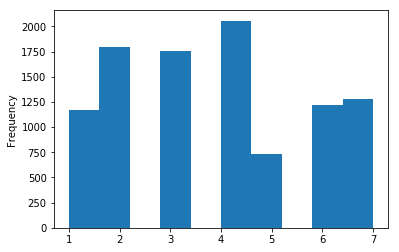

In [14]:
train_deduplicated.Accident_Type_Code.plot(kind='hist')

### 2.3.3 Histogram Plots Of Continuous Variables 

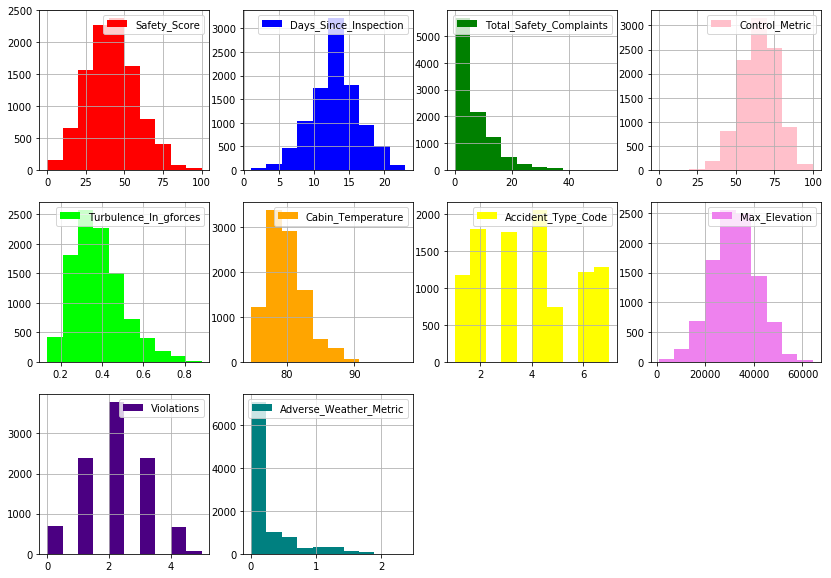

In [15]:
plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','yellow','violet','indigo','teal']
for i,j in zip(range(1,11),train_deduplicated.columns):
    plt.subplot(3,4,i)
    train_deduplicated[j].hist(color = clr[i-1], label=j)
    plt.legend()
    

<b> Inference Of Distribution: </b> <br>
<b> Normally Distributed: </b> Safety_Score, Days_Since_Inspection, Max_Elevation <br>
<b> Positively Skewed: </b> Total_Safety_Complaints, Cabin_Temperature, Adverse_Weather_Metric, Turbulence_In_gforces <br>
<b> Negatively Skewed: </b> Control_Metric <br>
<b> Categorical: </b> Accident_Type_Code, Violations <br>


### 2.3.4 Density Plots Of Continuous Variables 

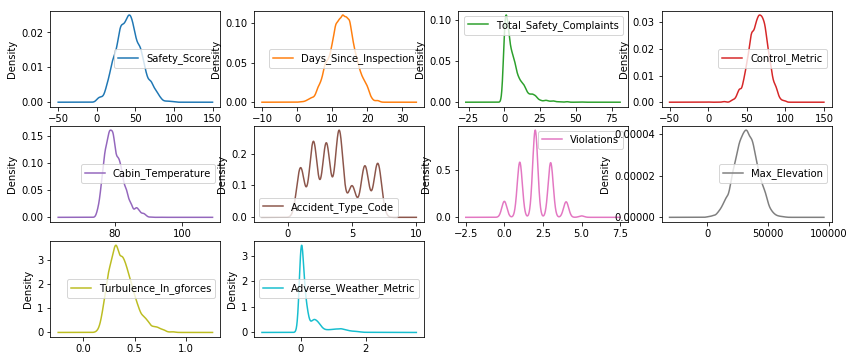

In [16]:
train_deduplicated[['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 
                    'Control_Metric', 'Cabin_Temperature', 'Accident_Type_Code', 
                    'Violations', 'Max_Elevation', 'Turbulence_In_gforces', 
                    'Adverse_Weather_Metric']].plot(kind='density', subplots=True, 
                                                    layout=(3,4), sharex=False,
                                                    sharey=False, figsize=(14,6))
plt.show()

### 2.3.5 Target Variable Plot

c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


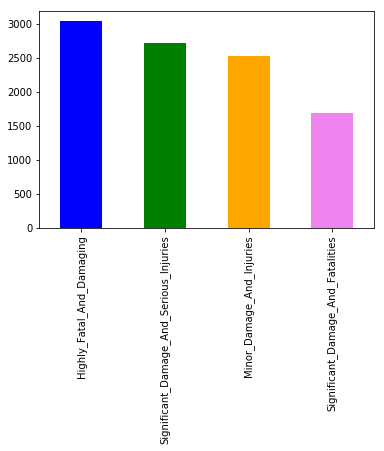

In [17]:
train_deduplicated.Severity.value_counts().plot(kind='bar', colors=['blue', 'green', 'orange', 'violet'])

# 2.4 Bi-variate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

### 2.4.1 Correlation Matrix Plot

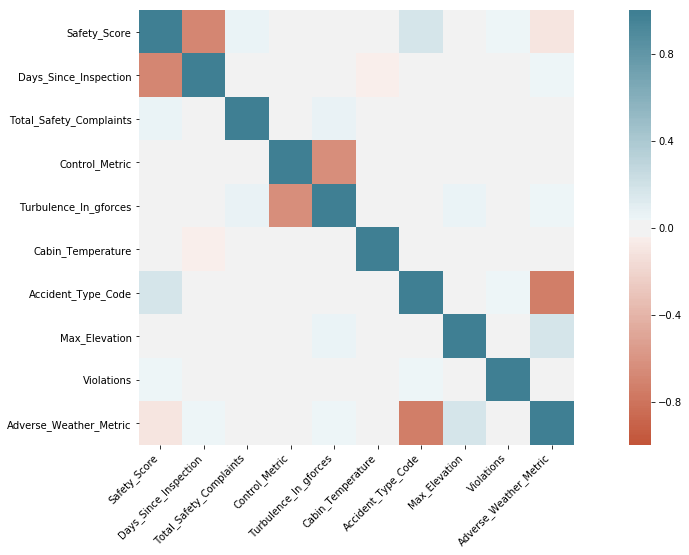

In [18]:
plt.figure(figsize=(20,8))
corr = train_deduplicated.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### 2.4.2 Scatterplot Matrix

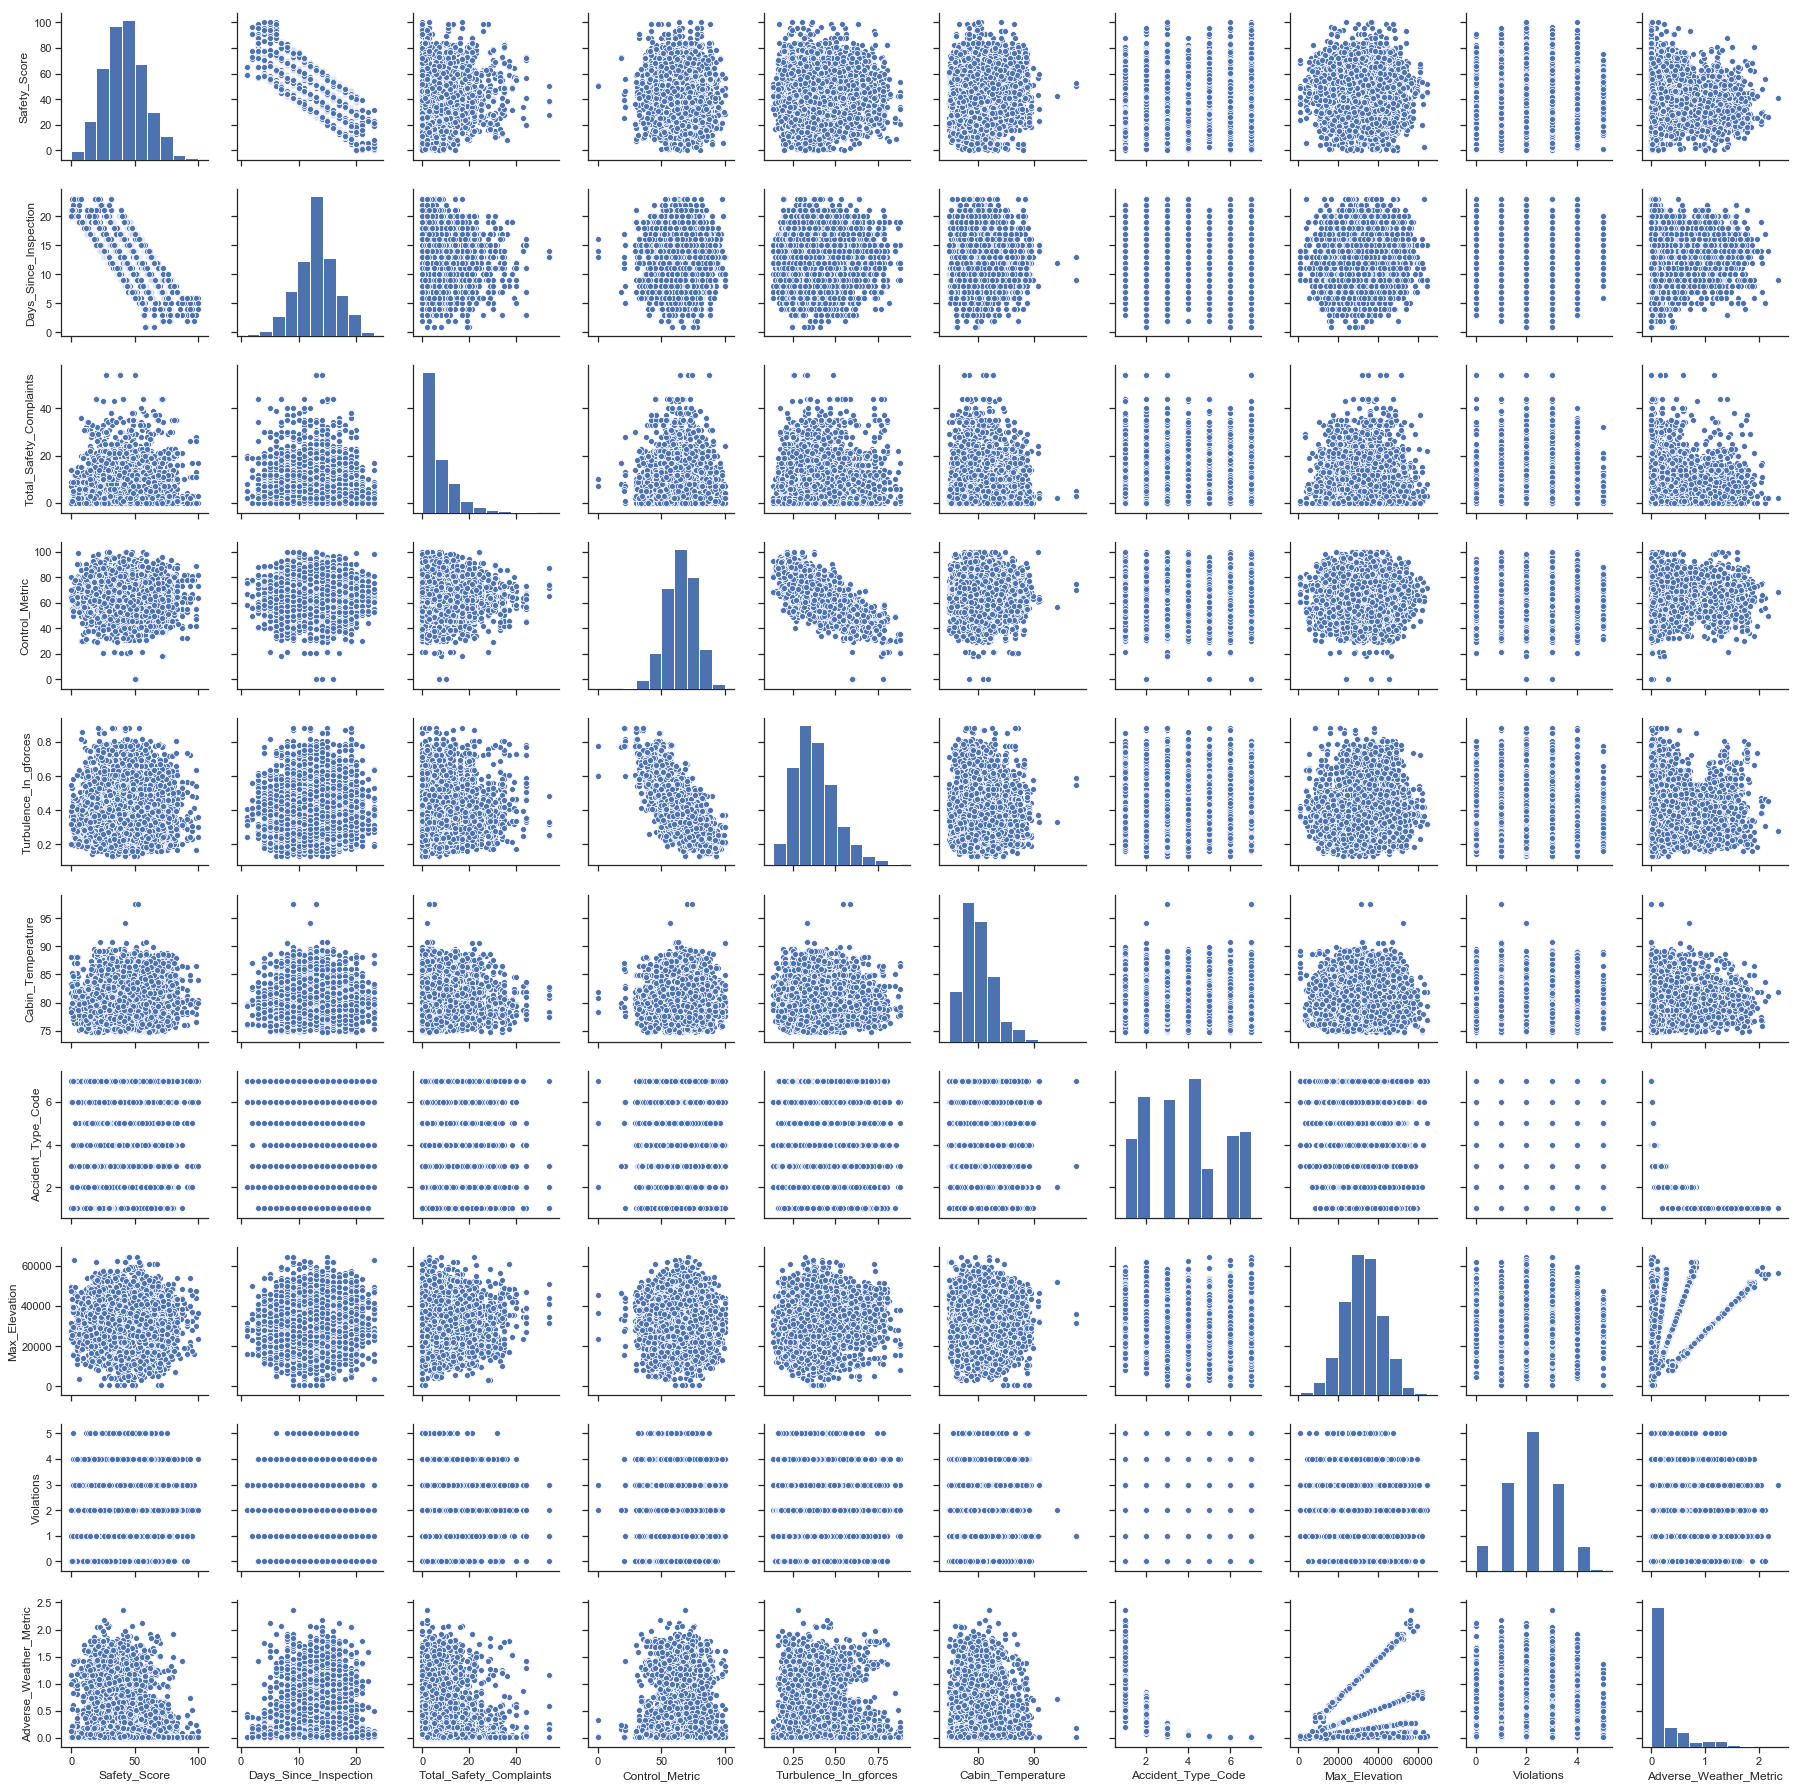

In [19]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(train_deduplicated)

# Step3: Data Transformation

There are various methods used to transform variables. Some of them include square root, cube root, logarithmic, binning, reciprocal and many others. Let’s look at these methods in detail by highlighting the pros and cons of these transformation methods. <br>

<b> Logarithm: </b> Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. Though, It can’t be applied to zero or negative values as well. <br> <br>
<b> Square / Cube root: </b> The square and cube root of a variable has a sound effect on variable distribution. However, it is not as significant as logarithmic transformation. Cube root has its own advantage. It can be applied to negative values including zero. Square root can be applied to positive values including zero. <br> <br>
<b> Binning: </b> It is used to categorize variables. It is performed on original values, percentile or frequency. Decision of categorization technique is based on business understanding. For example, we can categorize income in three categories, namely: High, Average and Low. We can also perform co-variate binning which depends on the value of more than one variables.

## 3.1 Treatment of Positively Skewed Data 

<b> Positively Skewed Variables: </b> Total_Safety_Complaints, Cabin_Temperature, Adverse_Weather_Metric, Turbulence_In_gforces <br>
<b> Negatively Skewed Variables: </b> Control_Metric <br>

In [20]:
train_deduplicated.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Severity'],
      dtype='object')

In [21]:
# Exponential Transformation of Positively skewed Data
train_deduplicated['Total_Safety_Complaints'] = np.log(train['Total_Safety_Complaints'])

c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [22]:
train_deduplicated['Cabin_Temperature'] = np.log(train['Cabin_Temperature'])
train_deduplicated['Adverse_Weather_Metric'] = np.log(train['Adverse_Weather_Metric'])
train_deduplicated['Turbulence_In_gforces'] = np.log(train['Turbulence_In_gforces'])

### 3.1.1 Replacing (-Inf) Negative Infinity Values With Median Of The Variable

In [23]:
train_deduplicated['Total_Safety_Complaints'] = train_deduplicated['Total_Safety_Complaints'].apply(lambda x: train_deduplicated['Total_Safety_Complaints'].median() if x == -np.inf else x)

In [24]:
train_deduplicated['Cabin_Temperature'] = train_deduplicated['Cabin_Temperature'].apply(lambda x: train_deduplicated['Cabin_Temperature'].median() if x == -np.inf else x)
train_deduplicated['Adverse_Weather_Metric'] = train_deduplicated['Adverse_Weather_Metric'].apply(lambda x: train_deduplicated['Adverse_Weather_Metric'].median() if x == -np.inf else x)
train_deduplicated['Turbulence_In_gforces'] = train_deduplicated['Turbulence_In_gforces'].apply(lambda x: train_deduplicated['Turbulence_In_gforces'].median() if x == -np.inf else x)

### 3.1.2 Re-plotting The Distribution of Variables After Transformation

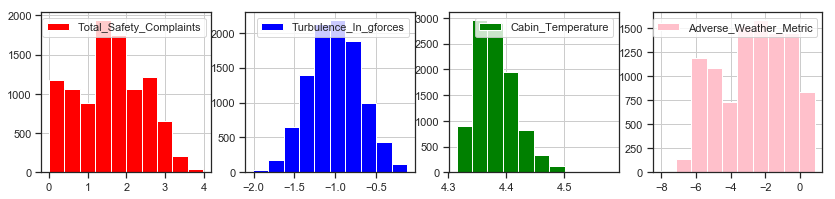

In [25]:
plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','indigo','teal']
cols = ['Total_Safety_Complaints', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Adverse_Weather_Metric']
for i,j in zip(range(1,11),cols):
    plt.subplot(3,4,i)
    train_deduplicated[j].hist(color = clr[i-1], label=j)
    plt.legend()

## 3.2 Treatment of Negatively Skewed Data

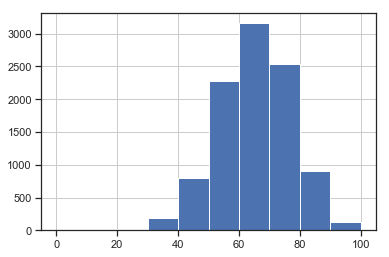

In [26]:
train_deduplicated['Control_Metric'].hist()

## 3.3 Label-encoding of Target Variable

In [27]:
train_deduplicated['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

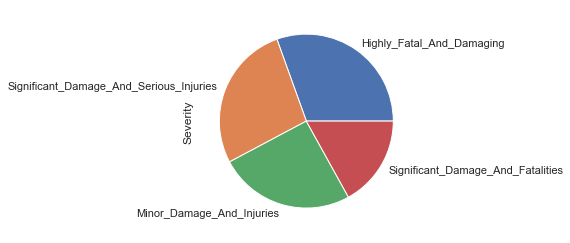

In [28]:
train_deduplicated['Severity'].value_counts().plot(kind='pie')

In [29]:
# Applying labelecoder on "Severity" column
from sklearn.preprocessing import LabelEncoder
laben = LabelEncoder()

train_deduplicated['Severity'] = laben.fit_transform(train_deduplicated['Severity'])

In [30]:
train_deduplicated['Severity'].value_counts()

0    3049
3    2729
1    2527
2    1695
Name: Severity, dtype: int64

In [31]:
copy_train_deduplicated_data = train_deduplicated.copy()

In [32]:
train_deduplicated = copy_train_deduplicated_data

## 3.4 New Variables Creation

In [33]:
train_deduplicated['elevation_complaints_ratio'] = train_deduplicated['Max_Elevation']/train_deduplicated['Total_Safety_Complaints']
train_deduplicated['elevation_violation_ratio'] = train_deduplicated['Max_Elevation']/train_deduplicated['Violations']

train_deduplicated['avg_adv_weather_metric'] = train_deduplicated['Adverse_Weather_Metric']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['adv_weather_metric_violation_ratio'] = train_deduplicated['Adverse_Weather_Metric']/train_deduplicated['Violations']

train_deduplicated['avg_safety_score'] = train_deduplicated['Safety_Score']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['safety_control_ratio'] = train_deduplicated['Safety_Score']/train_deduplicated['Control_Metric']
train_deduplicated['safety_turbulence_ratio'] = train_deduplicated['Safety_Score']/train_deduplicated['Turbulence_In_gforces']

train_deduplicated['avg_complaints'] = train_deduplicated['Total_Safety_Complaints']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['avg_control_metric'] = train_deduplicated['Control_Metric']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['avg_turbulence'] = train_deduplicated['Turbulence_In_gforces']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['avg_cabin_temp'] = train_deduplicated['Cabin_Temperature']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['avg_elevation'] = train_deduplicated['Max_Elevation']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['avg_violation'] = train_deduplicated['Violations']/train_deduplicated['Days_Since_Inspection']

train_deduplicated['Total_Safety_Complaints_control_ratio'] = train_deduplicated['Control_Metric']/train_deduplicated['Total_Safety_Complaints']
train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'] = train_deduplicated['Turbulence_In_gforces']/train_deduplicated['Total_Safety_Complaints']
train_deduplicated['Violations_Total_Safety_Complaints_ratio'] = train_deduplicated['Violations']/train_deduplicated['Total_Safety_Complaints']


### 3.4.1 Imputation Of Infinity Variables with Median

In [34]:
train_deduplicated['elevation_complaints_ratio'] = train_deduplicated['elevation_complaints_ratio'].apply(lambda x: train_deduplicated['elevation_complaints_ratio'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['elevation_violation_ratio'] = train_deduplicated['elevation_violation_ratio'].apply(lambda x: train_deduplicated['elevation_violation_ratio'].median() if x == -np.inf or x == np.inf else x)

train_deduplicated['avg_adv_weather_metric'] = train_deduplicated['avg_adv_weather_metric'].apply(lambda x: train_deduplicated['avg_adv_weather_metric'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['adv_weather_metric_violation_ratio'] = train_deduplicated['adv_weather_metric_violation_ratio'].apply(lambda x: train_deduplicated['adv_weather_metric_violation_ratio'].median() if x == -np.inf or x == np.inf else x)

train_deduplicated['avg_safety_score'] = train_deduplicated['avg_safety_score'].apply(lambda x: train_deduplicated['avg_safety_score'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['safety_control_ratio'] = train_deduplicated['safety_control_ratio'].apply(lambda x: train_deduplicated['safety_control_ratio'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['safety_turbulence_ratio'] = train_deduplicated['safety_turbulence_ratio'].apply(lambda x: train_deduplicated['safety_turbulence_ratio'].median() if x == -np.inf or x == np.inf else x)

train_deduplicated['avg_complaints'] = train_deduplicated['avg_complaints'].apply(lambda x: train_deduplicated['avg_complaints'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['avg_control_metric'] = train_deduplicated['avg_control_metric'].apply(lambda x: train_deduplicated['avg_control_metric'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['avg_turbulence'] = train_deduplicated['avg_turbulence'].apply(lambda x: train_deduplicated['avg_turbulence'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['avg_cabin_temp'] = train_deduplicated['avg_cabin_temp'].apply(lambda x: train_deduplicated['avg_cabin_temp'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['avg_elevation'] = train_deduplicated['avg_elevation'].apply(lambda x: train_deduplicated['avg_elevation'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['avg_violation'] = train_deduplicated['avg_violation'].apply(lambda x: train_deduplicated['avg_violation'].median() if x == -np.inf or x == np.inf else x)

train_deduplicated['Total_Safety_Complaints_control_ratio'] = train_deduplicated['Total_Safety_Complaints_control_ratio'].apply(lambda x: train_deduplicated['Total_Safety_Complaints_control_ratio'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'] = train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'].apply(lambda x: train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['Violations_Total_Safety_Complaints_ratio'] = train_deduplicated['Violations_Total_Safety_Complaints_ratio'].apply(lambda x: train_deduplicated['Violations_Total_Safety_Complaints_ratio'].median() if x == -np.inf or x == np.inf else x)


In [35]:
train_deduplicated.isnull().sum()

Safety_Score                                            0
Days_Since_Inspection                                   0
Total_Safety_Complaints                                 0
Control_Metric                                          0
Turbulence_In_gforces                                   0
Cabin_Temperature                                       0
Accident_Type_Code                                      0
Max_Elevation                                           0
Violations                                              0
Adverse_Weather_Metric                                  0
Severity                                                0
elevation_complaints_ratio                              0
elevation_violation_ratio                               0
avg_adv_weather_metric                                  0
adv_weather_metric_violation_ratio                      0
avg_safety_score                                        0
safety_control_ratio                                    0
safety_turbule

In [36]:
train_deduplicated['Violations_Total_Safety_Complaints_ratio'] = train_deduplicated['Violations_Total_Safety_Complaints_ratio'].apply(lambda x: train_deduplicated['Violations_Total_Safety_Complaints_ratio'].median() if x == np.nan else x)

### 3.4.2 Plotting Newly Created Variables

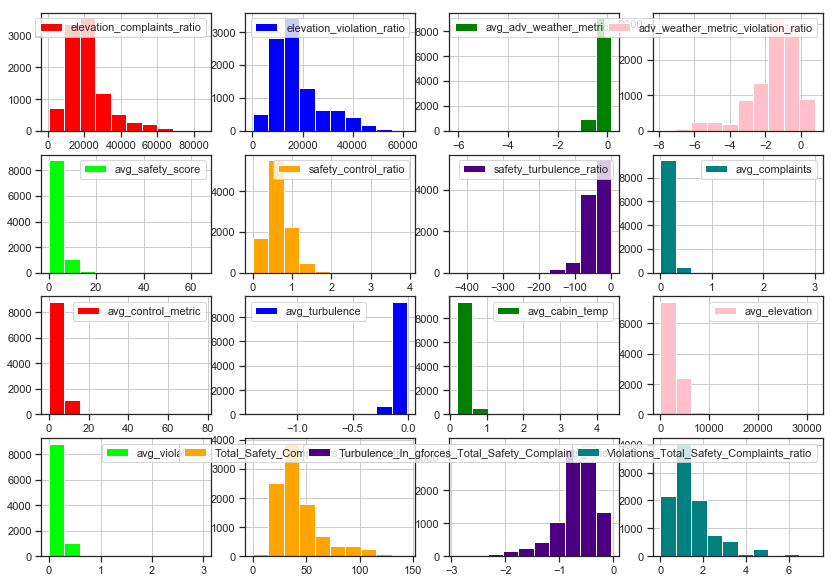

In [37]:
plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','indigo','teal',
    'red','blue','green','pink','lime','orange','indigo','teal']
cols = ['elevation_complaints_ratio', 'elevation_violation_ratio', 'avg_adv_weather_metric',
        'adv_weather_metric_violation_ratio', 'avg_safety_score', 'safety_control_ratio', 
        'safety_turbulence_ratio', 'avg_complaints', 'avg_control_metric', 'avg_turbulence', 
        'avg_cabin_temp', 'avg_elevation', 'avg_violation', 'Total_Safety_Complaints_control_ratio',
        'Turbulence_In_gforces_Total_Safety_Complaints_ratio', 'Violations_Total_Safety_Complaints_ratio']

for i,j in zip(range(1,17),cols):
    plt.subplot(4,4,i)
    train_deduplicated[j].hist(color = clr[i-1], label=j)
    plt.legend()

### 3.4.3 Data Normalization

#### 3.4.3.1 LOG of Values

In [38]:
train_deduplicated['elevation_complaints_ratio']=np.log(train_deduplicated['elevation_complaints_ratio'])
train_deduplicated['elevation_violation_ratio']=np.log(train_deduplicated['elevation_violation_ratio'])
train_deduplicated['avg_safety_score']=np.log(train_deduplicated['avg_safety_score'])
train_deduplicated['safety_control_ratio']=np.log(train_deduplicated['safety_control_ratio'])
train_deduplicated['avg_complaints']=np.log(train_deduplicated['avg_complaints'])
train_deduplicated['avg_control_metric']=np.log(train_deduplicated['avg_control_metric'])
train_deduplicated['avg_cabin_temp']=np.log(train_deduplicated['avg_cabin_temp'])
train_deduplicated['avg_elevation']=np.log(train_deduplicated['avg_elevation'])
train_deduplicated['avg_violation']=np.log(train_deduplicated['avg_violation'])
train_deduplicated['Total_Safety_Complaints_control_ratio']=np.log(train_deduplicated['Total_Safety_Complaints_control_ratio'])
train_deduplicated['Violations_Total_Safety_Complaints_ratio']=np.log(train_deduplicated['Violations_Total_Safety_Complaints_ratio'])


c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-

#### 3.4.3.2 EXPONENT of Values

In [39]:
train_deduplicated['avg_adv_weather_metric']=np.exp(train_deduplicated['avg_adv_weather_metric'])
train_deduplicated['adv_weather_metric_violation_ratio']=np.exp(train_deduplicated['adv_weather_metric_violation_ratio'])
train_deduplicated['safety_turbulence_ratio']=np.exp(train_deduplicated['safety_turbulence_ratio'])
train_deduplicated['avg_turbulence']=np.exp(train_deduplicated['avg_turbulence'])
train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio']=np.exp(train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'])


### Testing of Data after Transformation

In [40]:
train_deduplicated[train_deduplicated['avg_safety_score']==-np.inf]


,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,...,safety_turbulence_ratio,avg_complaints,avg_control_metric,avg_turbulence,avg_cabin_temp,avg_elevation,avg_violation,Total_Safety_Complaints_control_ratio,Turbulence_In_gforces_Total_Safety_Complaints_ratio,Violations_Total_Safety_Complaints_ratio
1339,0.0,20,0.000000,65.861440,-0.999557,4.402319,7,49433.302979,1,-5.386540,...,1.0,-inf,1.191821,0.951251,-1.513601,7.812647,-2.995732,3.723921,0.526513,0.264580
4690,0.0,20,1.945910,64.995442,-0.598866,4.423169,1,27361.800001,0,-0.002021,...,1.0,-2.330002,1.178585,0.970501,-1.508876,7.221171,-inf,3.508587,0.735095,-inf
9473,0.0,20,2.197225,80.446673,-0.924091,4.369574,1,31491.276359,2,0.150919,...,1.0,-2.208537,1.391862,0.954847,-1.521067,7.361734,-2.302585,3.600400,0.656671,-0.094048
4171,0.0,21,2.639057,63.901550,-1.131328,4.478586,3,24144.011527,2,-2.126510,...,1.0,-2.074101,1.112821,0.947553,-1.545215,7.047269,-2.351375,3.186922,0.651364,-0.277275
8619,0.0,20,1.386294,70.282589,-1.611275,4.361441,6,47182.814607,2,-4.456813,...,1.0,-2.669098,1.256792,0.922596,-1.522930,7.766053,-2.302585,3.925890,0.312769,0.366513


In [41]:
train_deduplicated[train_deduplicated['safety_control_ratio']==-np.inf]

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,...,safety_turbulence_ratio,avg_complaints,avg_control_metric,avg_turbulence,avg_cabin_temp,avg_elevation,avg_violation,Total_Safety_Complaints_control_ratio,Turbulence_In_gforces_Total_Safety_Complaints_ratio,Violations_Total_Safety_Complaints_ratio
1339,0.0,20,0.000000,65.861440,-0.999557,4.402319,7,49433.302979,1,-5.386540,...,1.0,-inf,1.191821,0.951251,-1.513601,7.812647,-2.995732,3.723921,0.526513,0.264580
4690,0.0,20,1.945910,64.995442,-0.598866,4.423169,1,27361.800001,0,-0.002021,...,1.0,-2.330002,1.178585,0.970501,-1.508876,7.221171,-inf,3.508587,0.735095,-inf
9473,0.0,20,2.197225,80.446673,-0.924091,4.369574,1,31491.276359,2,0.150919,...,1.0,-2.208537,1.391862,0.954847,-1.521067,7.361734,-2.302585,3.600400,0.656671,-0.094048
4171,0.0,21,2.639057,63.901550,-1.131328,4.478586,3,24144.011527,2,-2.126510,...,1.0,-2.074101,1.112821,0.947553,-1.545215,7.047269,-2.351375,3.186922,0.651364,-0.277275
8619,0.0,20,1.386294,70.282589,-1.611275,4.361441,6,47182.814607,2,-4.456813,...,1.0,-2.669098,1.256792,0.922596,-1.522930,7.766053,-2.302585,3.925890,0.312769,0.366513


In [43]:
train_deduplicated[train_deduplicated['avg_complaints']==-np.inf]


,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,...,safety_turbulence_ratio,avg_complaints,avg_control_metric,avg_turbulence,avg_cabin_temp,avg_elevation,avg_violation,Total_Safety_Complaints_control_ratio,Turbulence_In_gforces_Total_Safety_Complaints_ratio,Violations_Total_Safety_Complaints_ratio
3034,65.433790,12,0.0,63.263446,-0.959228,4.370460,5,28815.059530,2,-3.915665,...,2.369068e-30,-inf,1.662401,0.923176,-1.010038,7.783747,-1.791759,3.723921,0.526513,0.26458
16,10.867580,18,0.0,68.003646,-1.172403,4.407694,6,47893.717972,3,-4.488140,...,9.425630e-05,-inf,1.329190,0.936942,-1.407020,7.886368,-1.791759,3.723921,0.526513,0.26458
229,68.767123,8,0.0,58.340930,-0.864995,4.411343,2,34354.111221,1,-0.771025,...,2.975577e-35,-inf,1.986862,0.897516,-0.595262,8.365035,-2.079442,3.723921,0.526513,0.26458
8330,56.803653,12,0.0,68.824066,-1.607669,4.413162,2,19364.545391,2,-1.338326,...,4.519629e-16,-inf,1.746647,0.874614,-1.000315,7.386292,-1.791759,3.723921,0.526513,0.26458
2758,27.579909,17,0.0,57.292616,-0.811630,4.369828,5,18784.408684,4,-4.340396,...,1.746996e-15,-inf,1.214958,0.953379,-1.358490,7.007569,-1.446919,3.723921,0.526513,0.26458
6191,28.630137,13,0.0,97.675479,-1.568835,4.399252,4,23086.022694,2,-3.151535,...,1.186940e-08,-inf,2.016701,0.886318,-1.083515,7.482033,-1.871802,3.723921,0.526513,0.26458
9828,14.337900,17,0.0,60.209663,-1.004468,4.331523,4,47964.943389,1,-2.424077,...,6.321596e-07,-inf,1.264620,0.942625,-1.367294,7.945012,-2.833213,3.723921,0.526513,0.26458
5192,68.036530,12,0.0,72.971741,-0.707617,4.343676,7,15180.031790,2,-6.515488,...,1.750274e-42,-inf,1.805166,0.942737,-1.016186,7.142829,-1.791759,3.723921,0.526513,0.26458
263,53.424658,9,0.0,51.595260,-0.446365,4.366405,3,44244.629182,2,-1.511781,...,1.047192e-52,-inf,1.746205,0.951614,-0.723285,8.500265,-1.504077,3.723921,0.526513,0.26458
1280,53.789954,9,0.0,66.727438,-0.867568,4.373490,1,37933.399001,1,0.329001,...,1.184018e-27,-inf,2.003392,0.908104,-0.721663,8.346363,-2.197225,3.723921,0.526513,0.26458


In [44]:
train_deduplicated[train_deduplicated['avg_control_metric']==-np.inf]


,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,...,safety_turbulence_ratio,avg_complaints,avg_control_metric,avg_turbulence,avg_cabin_temp,avg_elevation,avg_violation,Total_Safety_Complaints_control_ratio,Turbulence_In_gforces_Total_Safety_Complaints_ratio,Violations_Total_Safety_Complaints_ratio
7202,50.319635,14,2.302585,0.0,-0.251405,4.391729,5,36354.488427,2,-3.707424,...,1.186956e-87,-1.805025,-inf,0.982203,-1.159334,7.862016,-1.945910,-inf,0.896566,-0.140885
4242,51.050228,13,2.302585,0.0,-0.500195,4.361696,2,23758.611545,2,-1.134233,...,4.738048e-45,-1.730917,-inf,0.962254,-1.092088,7.510751,-1.871802,-inf,0.804743,-0.140885
6723,50.228311,16,1.945910,0.0,-0.510356,4.404522,7,45290.883751,3,-5.478399,...,1.809268e-43,-2.106859,-inf,0.968606,-1.289957,7.948272,-1.673976,-inf,0.769303,0.432882


In [45]:
train_deduplicated[train_deduplicated['avg_violation']==-np.inf]


,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,...,safety_turbulence_ratio,avg_complaints,avg_control_metric,avg_turbulence,avg_cabin_temp,avg_elevation,avg_violation,Total_Safety_Complaints_control_ratio,Turbulence_In_gforces_Total_Safety_Complaints_ratio,Violations_Total_Safety_Complaints_ratio
1219,38.401826,13,1.945910,52.324521,-1.368662,4.371345,3,21369.813082,0,-2.245342,...,6.525218e-13,-1.899220,1.392516,0.900071,-1.089879,7.404785,-inf,3.291735,0.494923,-inf
679,59.452055,14,1.098612,54.421149,-0.935054,4.315085,7,45857.965987,0,-5.459082,...,2.437464e-28,-2.545010,1.357696,0.935392,-1.176940,8.094247,-inf,3.902705,0.426935,-inf
6686,55.159817,8,2.564949,66.134913,-1.014363,4.335590,3,58297.480266,0,-1.294398,...,2.418827e-24,-1.137503,2.112255,0.880914,-0.612584,8.893873,-inf,3.249758,0.673363,-inf
5406,40.319635,13,1.386294,61.896080,-1.333844,4.437461,6,47495.659515,0,-4.480449,...,7.448651e-14,-2.238315,1.560507,0.902485,-1.074867,8.203444,-inf,3.798823,0.382065,-inf
1910,26.347032,14,0.693147,51.048314,-0.270127,4.361441,5,32372.422257,0,-3.804397,...,4.373331e-43,-3.005570,1.293715,0.980890,-1.166255,7.746005,-inf,4.299285,0.677252,-inf
2035,62.557078,10,2.890372,54.238833,-0.974400,4.372229,2,44097.243159,0,-0.516188,...,1.312297e-28,-1.241200,1.690812,0.907157,-0.827312,8.391567,-inf,2.932012,0.713824,-inf
4356,13.789954,17,1.098612,65.177758,-0.782819,4.378395,4,28036.275095,0,-2.964886,...,2.236492e-08,-2.739166,1.343905,0.954996,-1.356531,7.408041,-inf,4.083070,0.490391,-inf
2174,47.351598,14,0.000000,48.085688,-0.803543,4.387387,3,38720.452370,0,-1.650957,...,2.556715e-26,-inf,1.233927,0.944220,-1.160323,7.925066,-inf,3.723921,0.526513,NaN
4611,45.616438,15,0.693147,65.815861,-1.493810,4.383151,2,34076.453614,0,-0.771025,...,5.469626e-14,-3.074563,1.478811,0.905211,-1.230282,7.728312,-inf,4.553374,0.115890,-inf
4710,40.365297,13,2.079442,79.398359,-1.152796,4.352212,3,45239.952477,0,-1.501214,...,6.210510e-16,-1.832850,1.809528,0.915141,-1.094265,8.154787,-inf,3.642378,0.574430,-inf


In [46]:
train_deduplicated[train_deduplicated['Total_Safety_Complaints_control_ratio']==-np.inf]


,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,...,safety_turbulence_ratio,avg_complaints,avg_control_metric,avg_turbulence,avg_cabin_temp,avg_elevation,avg_violation,Total_Safety_Complaints_control_ratio,Turbulence_In_gforces_Total_Safety_Complaints_ratio,Violations_Total_Safety_Complaints_ratio
7202,50.319635,14,2.302585,0.0,-0.251405,4.391729,5,36354.488427,2,-3.707424,...,1.186956e-87,-1.805025,-inf,0.982203,-1.159334,7.862016,-1.945910,-inf,0.896566,-0.140885
4242,51.050228,13,2.302585,0.0,-0.500195,4.361696,2,23758.611545,2,-1.134233,...,4.738048e-45,-1.730917,-inf,0.962254,-1.092088,7.510751,-1.871802,-inf,0.804743,-0.140885
6723,50.228311,16,1.945910,0.0,-0.510356,4.404522,7,45290.883751,3,-5.478399,...,1.809268e-43,-2.106859,-inf,0.968606,-1.289957,7.948272,-1.673976,-inf,0.769303,0.432882


In [47]:
train_deduplicated[train_deduplicated['Violations_Total_Safety_Complaints_ratio']==-np.inf]


,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,...,safety_turbulence_ratio,avg_complaints,avg_control_metric,avg_turbulence,avg_cabin_temp,avg_elevation,avg_violation,Total_Safety_Complaints_control_ratio,Turbulence_In_gforces_Total_Safety_Complaints_ratio,Violations_Total_Safety_Complaints_ratio
1219,38.401826,13,1.945910,52.324521,-1.368662,4.371345,3,21369.813082,0,-2.245342,...,6.525218e-13,-1.899220,1.392516,0.900071,-1.089879,7.404785,-inf,3.291735,0.494923,-inf
679,59.452055,14,1.098612,54.421149,-0.935054,4.315085,7,45857.965987,0,-5.459082,...,2.437464e-28,-2.545010,1.357696,0.935392,-1.176940,8.094247,-inf,3.902705,0.426935,-inf
6686,55.159817,8,2.564949,66.134913,-1.014363,4.335590,3,58297.480266,0,-1.294398,...,2.418827e-24,-1.137503,2.112255,0.880914,-0.612584,8.893873,-inf,3.249758,0.673363,-inf
5406,40.319635,13,1.386294,61.896080,-1.333844,4.437461,6,47495.659515,0,-4.480449,...,7.448651e-14,-2.238315,1.560507,0.902485,-1.074867,8.203444,-inf,3.798823,0.382065,-inf
1910,26.347032,14,0.693147,51.048314,-0.270127,4.361441,5,32372.422257,0,-3.804397,...,4.373331e-43,-3.005570,1.293715,0.980890,-1.166255,7.746005,-inf,4.299285,0.677252,-inf
2035,62.557078,10,2.890372,54.238833,-0.974400,4.372229,2,44097.243159,0,-0.516188,...,1.312297e-28,-1.241200,1.690812,0.907157,-0.827312,8.391567,-inf,2.932012,0.713824,-inf
4356,13.789954,17,1.098612,65.177758,-0.782819,4.378395,4,28036.275095,0,-2.964886,...,2.236492e-08,-2.739166,1.343905,0.954996,-1.356531,7.408041,-inf,4.083070,0.490391,-inf
4611,45.616438,15,0.693147,65.815861,-1.493810,4.383151,2,34076.453614,0,-0.771025,...,5.469626e-14,-3.074563,1.478811,0.905211,-1.230282,7.728312,-inf,4.553374,0.115890,-inf
4710,40.365297,13,2.079442,79.398359,-1.152796,4.352212,3,45239.952477,0,-1.501214,...,6.210510e-16,-1.832850,1.809528,0.915141,-1.094265,8.154787,-inf,3.642378,0.574430,-inf
6169,22.922374,15,1.386294,63.354603,-0.550813,4.359014,4,40729.814777,0,-2.598330,...,8.444971e-19,-2.381416,1.440697,0.963945,-1.235804,7.906665,-inf,3.822113,0.672114,-inf


### 3.4.4 Imputation of Negative and Positive Infinity Values Arisese from LOG & EXPONENT

In [48]:
#train_deduplicated['elevation_complaints_ratio'] = train_deduplicated['elevation_complaints_ratio'].apply(lambda x: train_deduplicated['elevation_complaints_ratio'].median() if x == -np.inf or x == np.inf else x)
#train_deduplicated['elevation_violation_ratio'] = train_deduplicated['elevation_violation_ratio'].apply(lambda x: train_deduplicated['elevation_violation_ratio'].median() if x == -np.inf or x == np.inf else x)

#train_deduplicated['avg_adv_weather_metric'] = train_deduplicated['avg_adv_weather_metric'].apply(lambda x: train_deduplicated['avg_adv_weather_metric'].median() if x == -np.inf or x == np.inf else x)
#train_deduplicated['adv_weather_metric_violation_ratio'] = train_deduplicated['adv_weather_metric_violation_ratio'].apply(lambda x: train_deduplicated['adv_weather_metric_violation_ratio'].median() if x == -np.inf or x == np.inf else x)

train_deduplicated['avg_safety_score'] = train_deduplicated['avg_safety_score'].apply(lambda x: train_deduplicated['avg_safety_score'].median() if x == -np.inf else x)
train_deduplicated['safety_control_ratio'] = train_deduplicated['safety_control_ratio'].apply(lambda x: train_deduplicated['safety_control_ratio'].median() if x == -np.inf else x)
#train_deduplicated['safety_turbulence_ratio'] = train_deduplicated['safety_turbulence_ratio'].apply(lambda x: train_deduplicated['safety_turbulence_ratio'].median() if x == -np.inf or x == np.inf else x)

train_deduplicated['avg_complaints'] = train_deduplicated['avg_complaints'].apply(lambda x: train_deduplicated['avg_complaints'].median() if x == -np.inf else x)
train_deduplicated['avg_control_metric'] = train_deduplicated['avg_control_metric'].apply(lambda x: train_deduplicated['avg_control_metric'].median() if x == -np.inf else x)
#train_deduplicated['avg_turbulence'] = train_deduplicated['avg_turbulence'].apply(lambda x: train_deduplicated['avg_turbulence'].median() if x == -np.inf or x == np.inf else x)
#train_deduplicated['avg_cabin_temp'] = train_deduplicated['avg_cabin_temp'].apply(lambda x: train_deduplicated['avg_cabin_temp'].median() if x == -np.inf or x == np.inf else x)
#train_deduplicated['avg_elevation'] = train_deduplicated['avg_elevation'].apply(lambda x: train_deduplicated['avg_elevation'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['avg_violation'] = train_deduplicated['avg_violation'].apply(lambda x: train_deduplicated['avg_violation'].median() if x == -np.inf else x)

train_deduplicated['Total_Safety_Complaints_control_ratio'] = train_deduplicated['Total_Safety_Complaints_control_ratio'].apply(lambda x: train_deduplicated['Total_Safety_Complaints_control_ratio'].median() if x == -np.inf else x)
#train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'] = train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'].apply(lambda x: train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['Violations_Total_Safety_Complaints_ratio'] = train_deduplicated['Violations_Total_Safety_Complaints_ratio'].apply(lambda x: train_deduplicated['Violations_Total_Safety_Complaints_ratio'].median() if x == -np.inf else x)


In [49]:
train_deduplicated.isnull().sum()

Safety_Score                                            0
Days_Since_Inspection                                   0
Total_Safety_Complaints                                 0
Control_Metric                                          0
Turbulence_In_gforces                                   0
Cabin_Temperature                                       0
Accident_Type_Code                                      0
Max_Elevation                                           0
Violations                                              0
Adverse_Weather_Metric                                  0
Severity                                                0
elevation_complaints_ratio                              0
elevation_violation_ratio                               0
avg_adv_weather_metric                                  0
adv_weather_metric_violation_ratio                      0
avg_safety_score                                        0
safety_control_ratio                                    0
safety_turbule

In [50]:
#train_deduplicated['Violations_Total_Safety_Complaints_ratio'] = train_deduplicated['Violations_Total_Safety_Complaints_ratio'].apply(lambda x: train_deduplicated['Violations_Total_Safety_Complaints_ratio'].median() if x == np.nan else x)
train_deduplicated['Violations_Total_Safety_Complaints_ratio'].fillna(train_deduplicated['Violations_Total_Safety_Complaints_ratio'].median(), inplace=True)

In [51]:
train_deduplicated.isnull().sum()

Safety_Score                                           0
Days_Since_Inspection                                  0
Total_Safety_Complaints                                0
Control_Metric                                         0
Turbulence_In_gforces                                  0
Cabin_Temperature                                      0
Accident_Type_Code                                     0
Max_Elevation                                          0
Violations                                             0
Adverse_Weather_Metric                                 0
Severity                                               0
elevation_complaints_ratio                             0
elevation_violation_ratio                              0
avg_adv_weather_metric                                 0
adv_weather_metric_violation_ratio                     0
avg_safety_score                                       0
safety_control_ratio                                   0
safety_turbulence_ratio        

### 3.4.5 Plot After Imputation

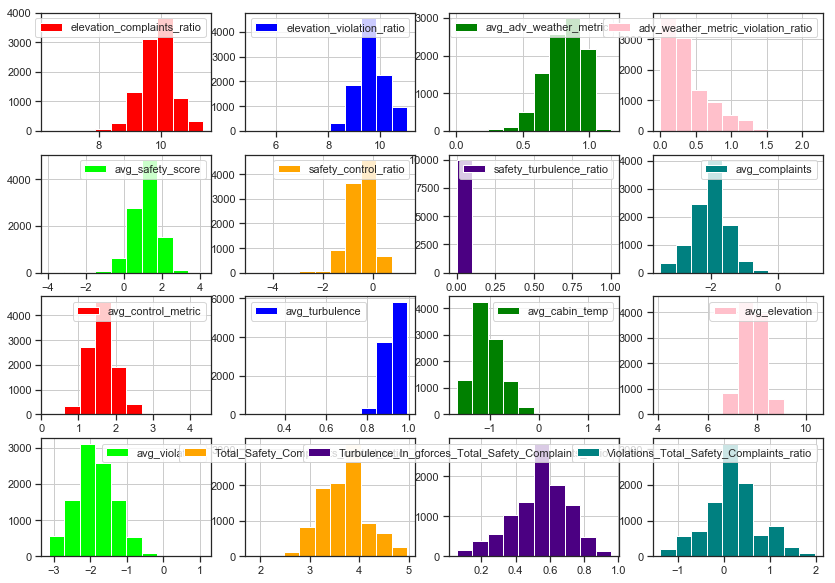

In [52]:
plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','indigo','teal',
    'red','blue','green','pink','lime','orange','indigo','teal']
cols = ['elevation_complaints_ratio', 'elevation_violation_ratio', 'avg_adv_weather_metric',
        'adv_weather_metric_violation_ratio', 'avg_safety_score', 'safety_control_ratio', 
        'safety_turbulence_ratio', 'avg_complaints', 'avg_control_metric', 'avg_turbulence', 
        'avg_cabin_temp', 'avg_elevation', 'avg_violation', 'Total_Safety_Complaints_control_ratio',
        'Turbulence_In_gforces_Total_Safety_Complaints_ratio', 'Violations_Total_Safety_Complaints_ratio']

for i,j in zip(range(1,17),cols):
    plt.subplot(4,4,i)
    train_deduplicated[j].hist(color = clr[i-1], label=j)
    plt.legend()

# Step4: Separating X and Y

In [53]:
train_deduplicated.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Severity', 'elevation_complaints_ratio',
       'elevation_violation_ratio', 'avg_adv_weather_metric',
       'adv_weather_metric_violation_ratio', 'avg_safety_score',
       'safety_control_ratio', 'safety_turbulence_ratio', 'avg_complaints',
       'avg_control_metric', 'avg_turbulence', 'avg_cabin_temp',
       'avg_elevation', 'avg_violation',
       'Total_Safety_Complaints_control_ratio',
       'Turbulence_In_gforces_Total_Safety_Complaints_ratio',
       'Violations_Total_Safety_Complaints_ratio'],
      dtype='object')

In [54]:
train_deduplicated.head(5)

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,...,safety_turbulence_ratio,avg_complaints,avg_control_metric,avg_turbulence,avg_cabin_temp,avg_elevation,avg_violation,Total_Safety_Complaints_control_ratio,Turbulence_In_gforces_Total_Safety_Complaints_ratio,Violations_Total_Safety_Complaints_ratio
4921,70.000000,8,1.945910,80.401094,-1.226238,4.404033,2,43912.821280,2,-0.523173,...,1.615228e-25,-1.413712,2.307586,0.857890,-0.596921,8.610520,-1.386294,3.721298,0.532506,0.027417
8277,37.214612,10,1.098612,52.597995,-0.785188,4.355554,4,32253.380602,1,-2.841470,...,2.607774e-21,-2.208537,1.660093,0.924485,-0.831133,8.078793,-2.302585,3.868630,0.489334,-0.094048
3737,44.200913,8,2.995732,87.055606,-1.404737,4.340423,7,45783.527661,2,-5.550079,...,2.160999e-14,-0.982253,2.387106,0.838960,-0.611470,8.652238,-1.386294,3.369358,0.625682,-0.404042
3034,65.433790,12,0.000000,63.263446,-0.959228,4.370460,5,28815.059530,2,-3.915665,...,2.369068e-30,-2.106859,1.662401,0.923176,-1.010038,7.783747,-1.791759,3.723921,0.526513,0.264580
2801,13.789954,20,2.484907,70.601641,-1.182941,4.394449,3,32269.068351,2,-1.828567,...,8.655188e-06,-2.085497,1.261321,0.942568,-1.515390,7.386132,-2.302585,3.346818,0.621232,-0.217088


## 4.1 Re-setting Index Before Splitting

In [55]:
train_deduplicated.reset_index(inplace=True)

In [56]:
train_deduplicated.drop(columns=['index'], axis=1, inplace=True)

In [57]:
train_deduplicated

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,...,safety_turbulence_ratio,avg_complaints,avg_control_metric,avg_turbulence,avg_cabin_temp,avg_elevation,avg_violation,Total_Safety_Complaints_control_ratio,Turbulence_In_gforces_Total_Safety_Complaints_ratio,Violations_Total_Safety_Complaints_ratio
0,70.000000,8,1.945910,80.401094,-1.226238,4.404033,2,43912.821280,2,-0.523173,...,1.615228e-25,-1.413712,2.307586,0.857890,-0.596921,8.610520,-1.386294,3.721298,0.532506,0.027417
1,37.214612,10,1.098612,52.597995,-0.785188,4.355554,4,32253.380602,1,-2.841470,...,2.607774e-21,-2.208537,1.660093,0.924485,-0.831133,8.078793,-2.302585,3.868630,0.489334,-0.094048
2,44.200913,8,2.995732,87.055606,-1.404737,4.340423,7,45783.527661,2,-5.550079,...,2.160999e-14,-0.982253,2.387106,0.838960,-0.611470,8.652238,-1.386294,3.369358,0.625682,-0.404042
3,65.433790,12,0.000000,63.263446,-0.959228,4.370460,5,28815.059530,2,-3.915665,...,2.369068e-30,-2.106859,1.662401,0.923176,-1.010038,7.783747,-1.791759,3.723921,0.526513,0.264580
4,13.789954,20,2.484907,70.601641,-1.182941,4.394449,3,32269.068351,2,-1.828567,...,8.655188e-06,-2.085497,1.261321,0.942568,-1.515390,7.386132,-2.302585,3.346818,0.621232,-0.217088
5,55.114155,9,2.890372,63.901550,-1.079062,4.354784,7,48569.556285,1,-5.405256,...,6.576334e-23,-1.135839,1.960119,0.887013,-0.725950,8.593528,-2.197225,3.095958,0.688438,-1.061385
6,15.753425,20,3.135494,82.133090,-0.833797,4.434738,1,34289.900237,2,0.232266,...,6.231842e-09,-1.852945,1.412609,0.959167,-1.506264,7.446874,-2.302585,3.265554,0.766499,-0.449640
7,18.127854,16,1.609438,73.199635,-1.588063,4.353370,4,31778.056103,3,-2.861013,...,1.102803e-05,-2.296704,1.520602,0.905513,-1.301638,7.593943,-1.673976,3.817305,0.372798,0.622727
8,27.488584,20,2.833213,72.652689,-1.635039,4.345492,7,30271.194768,3,-5.941674,...,4.995257e-08,-1.954321,1.289958,0.921501,-1.526593,7.322220,-1.897120,3.244279,0.561526,0.057201
9,73.515982,10,2.995732,57.520510,-0.923182,4.419804,5,33095.911579,2,-3.834948,...,2.604570e-35,-1.205396,1.749556,0.911815,-0.816490,8.104580,-1.609438,2.954953,0.734793,-0.404042


## 4.2 Split Data

In [58]:
x = train_deduplicated.drop(['Severity'], axis=1)
y = train_deduplicated['Severity']

# Step5: Creating Train and Test Set In Ratio 80:20

In [59]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# Step6: Model Building

## 6.1 Identification Of Best Features

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(x, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


df_feat = pd.DataFrame(fit.ranking_, x.columns)
df_feat.rename(columns = {0:"Feature_Ranking"}, inplace=True)


c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "t

c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\bhuwanesh\appdata\local\programs\python

c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\bhuwanesh\appdata\local\programs\python

Num Features: 3
Selected Features: [False False False False False False False False False False False False
  True False False False False False False  True  True False False False
 False False]
Feature Ranking: [21  8 18 22 16  7 13 24 20  9 15 23  1  6  5  2  4 12  3  1  1 14 17 11
 10 19]


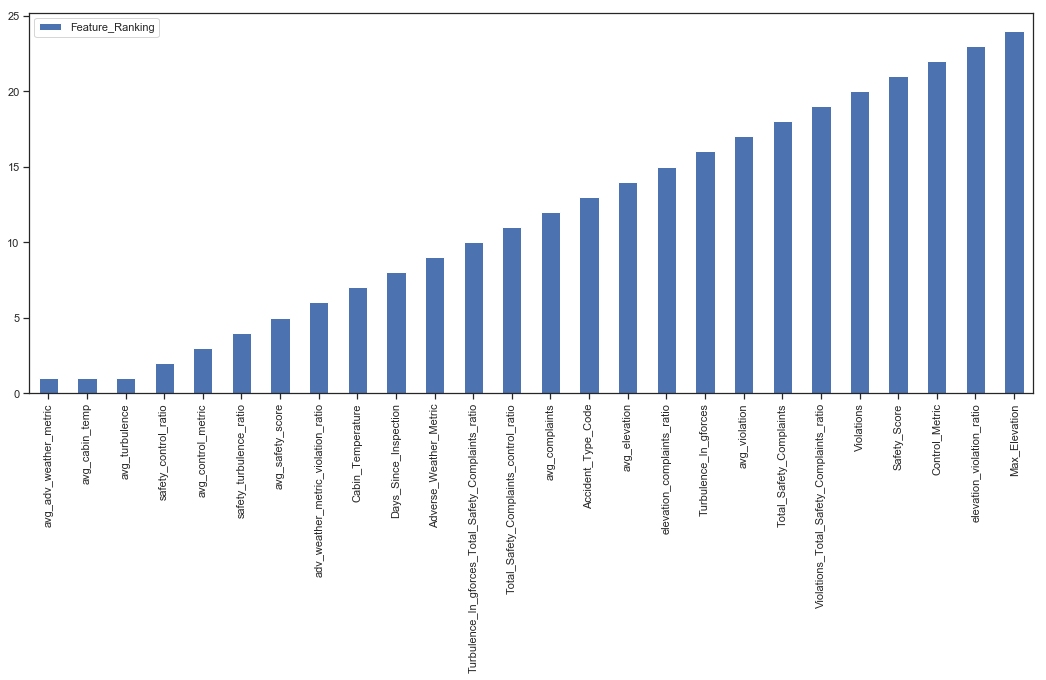

In [61]:
df_feat.sort_values(by="Feature_Ranking").plot(kind='bar', figsize=(18,7))

## 6.2 Importing and Model Fitting

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report


### 6.2.1 Decision Trees

In [63]:
from sklearn.tree import DecisionTreeClassifier

#making the instance
model= DecisionTreeClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_dt = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_dt.predict(X_test)

print("*******************ACCURACY***************************************************************")
#Check Prediction Score
print("Accuracy of Decision Trees: ",accuracy_score(y_test, predictions))

print("*******************CLASSIFICATION - REPORT***************************************************************")
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))




*******************ACCURACY***************************************************************
Accuracy of Decision Trees:  0.8325
*******************CLASSIFICATION - REPORT***************************************************************
Confusion matrix 
 [[526  26  13  37]
 [ 28 424  28  37]
 [ 11  39 285  24]
 [ 35  49   8 430]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       602
           1       0.79      0.82      0.80       517
           2       0.85      0.79      0.82       359
           3       0.81      0.82      0.82       522

   micro avg       0.83      0.83      0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



### 6.2.2 Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

#making the instance
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_rf = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_rf.predict(X_test)

#Check Prediction Score
print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))



Accuracy of Random Forest:  0.939
Confusion matrix 
 [[563  18   9  12]
 [ 13 487   8   9]
 [  4  12 337   6]
 [ 11  19   1 491]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       602
           1       0.91      0.94      0.92       517
           2       0.95      0.94      0.94       359
           3       0.95      0.94      0.94       522

   micro avg       0.94      0.94      0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



# Phase2: Applying Model On Test Data

In [78]:
test = pd.read_csv('test.csv')

test.shape

(2500, 11)

In [79]:
test.head(5)

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [80]:
test_for_prediction = test[['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 
               'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
               'Violations', 'Adverse_Weather_Metric']]

In [81]:
test_for_prediction['elevation_complaints_ratio'] = test_for_prediction['Max_Elevation']/test_for_prediction['Total_Safety_Complaints']
test_for_prediction['elevation_violation_ratio'] = test_for_prediction['Max_Elevation']/test_for_prediction['Violations']

test_for_prediction['avg_adv_weather_metric'] = test_for_prediction['Adverse_Weather_Metric']/test_for_prediction['Days_Since_Inspection']
test_for_prediction['adv_weather_metric_violation_ratio'] = test_for_prediction['Adverse_Weather_Metric']/test_for_prediction['Violations']

test_for_prediction['avg_safety_score'] = test_for_prediction['Safety_Score']/test_for_prediction['Days_Since_Inspection']
test_for_prediction['safety_control_ratio'] = test_for_prediction['Safety_Score']/test_for_prediction['Control_Metric']
test_for_prediction['safety_turbulence_ratio'] = test_for_prediction['Safety_Score']/test_for_prediction['Turbulence_In_gforces']

test_for_prediction['avg_complaints'] = test_for_prediction['Total_Safety_Complaints']/test_for_prediction['Days_Since_Inspection']
test_for_prediction['avg_control_metric'] = test_for_prediction['Control_Metric']/test_for_prediction['Days_Since_Inspection']
test_for_prediction['avg_turbulence'] = test_for_prediction['Turbulence_In_gforces']/test_for_prediction['Days_Since_Inspection']
test_for_prediction['avg_cabin_temp'] = test_for_prediction['Cabin_Temperature']/test_for_prediction['Days_Since_Inspection']
test_for_prediction['avg_elevation'] = test_for_prediction['Max_Elevation']/test_for_prediction['Days_Since_Inspection']
test_for_prediction['avg_violation'] = test_for_prediction['Violations']/test_for_prediction['Days_Since_Inspection']

test_for_prediction['Total_Safety_Complaints_control_ratio'] = test_for_prediction['Control_Metric']/test_for_prediction['Total_Safety_Complaints']
test_for_prediction['Turbulence_In_gforces_Total_Safety_Complaints_ratio'] = test_for_prediction['Turbulence_In_gforces']/test_for_prediction['Total_Safety_Complaints']
test_for_prediction['Violations_Total_Safety_Complaints_ratio'] = test_for_prediction['Violations']/test_for_prediction['Total_Safety_Complaints']


#*************************************************************************************************
#*************************************************************************************************
#*************************************************************************************************

test_for_prediction['elevation_complaints_ratio'] = test_for_prediction['elevation_complaints_ratio'].apply(lambda x: test_for_prediction['elevation_complaints_ratio'].median() if x == -np.inf or x == np.inf else x)
test_for_prediction['elevation_violation_ratio'] = test_for_prediction['elevation_violation_ratio'].apply(lambda x: test_for_prediction['elevation_violation_ratio'].median() if x == -np.inf or x == np.inf else x)

test_for_prediction['avg_adv_weather_metric'] = test_for_prediction['avg_adv_weather_metric'].apply(lambda x: test_for_prediction['avg_adv_weather_metric'].median() if x == -np.inf or x == np.inf else x)
test_for_prediction['adv_weather_metric_violation_ratio'] = test_for_prediction['adv_weather_metric_violation_ratio'].apply(lambda x: test_for_prediction['adv_weather_metric_violation_ratio'].median() if x == -np.inf or x == np.inf else x)

test_for_prediction['avg_safety_score'] = test_for_prediction['avg_safety_score'].apply(lambda x: test_for_prediction['avg_safety_score'].median() if x == -np.inf or x == np.inf else x)
test_for_prediction['safety_control_ratio'] = test_for_prediction['safety_control_ratio'].apply(lambda x: test_for_prediction['safety_control_ratio'].median() if x == -np.inf or x == np.inf  else x)
test_for_prediction['safety_turbulence_ratio'] = test_for_prediction['safety_turbulence_ratio'].apply(lambda x: test_for_prediction['safety_turbulence_ratio'].median() if x == -np.inf or x == np.inf  else x)

test_for_prediction['avg_complaints'] = test_for_prediction['avg_complaints'].apply(lambda x: test_for_prediction['avg_complaints'].median() if x == -np.inf or x == np.inf else x)
test_for_prediction['avg_control_metric'] = test_for_prediction['avg_control_metric'].apply(lambda x: test_for_prediction['avg_control_metric'].median() if x == -np.inf or x == np.inf  else x)
test_for_prediction['avg_turbulence'] = test_for_prediction['avg_turbulence'].apply(lambda x: test_for_prediction['avg_turbulence'].median() if x == -np.inf or x == np.inf else x)
test_for_prediction['avg_cabin_temp'] = test_for_prediction['avg_cabin_temp'].apply(lambda x: test_for_prediction['avg_cabin_temp'].median() if x == -np.inf or x == np.inf  else x)
test_for_prediction['avg_elevation'] = test_for_prediction['avg_elevation'].apply(lambda x: test_for_prediction['avg_elevation'].median() if x == -np.inf or x == np.inf  else x)
test_for_prediction['avg_violation'] = test_for_prediction['avg_violation'].apply(lambda x: test_for_prediction['avg_violation'].median() if x == -np.inf or x == np.inf  else x)

test_for_prediction['Total_Safety_Complaints_control_ratio'] = test_for_prediction['Total_Safety_Complaints_control_ratio'].apply(lambda x: test_for_prediction['Total_Safety_Complaints_control_ratio'].median() if x == -np.inf or x == np.inf  else x)
test_for_prediction['Turbulence_In_gforces_Total_Safety_Complaints_ratio'] = test_for_prediction['Turbulence_In_gforces_Total_Safety_Complaints_ratio'].apply(lambda x: test_for_prediction['Turbulence_In_gforces_Total_Safety_Complaints_ratio'].median() if x == -np.inf or x == np.inf  else x)
test_for_prediction['Violations_Total_Safety_Complaints_ratio'] = test_for_prediction['Violations_Total_Safety_Complaints_ratio'].apply(lambda x: test_for_prediction['Violations_Total_Safety_Complaints_ratio'].median() if x == -np.inf or x == np.inf  else x)


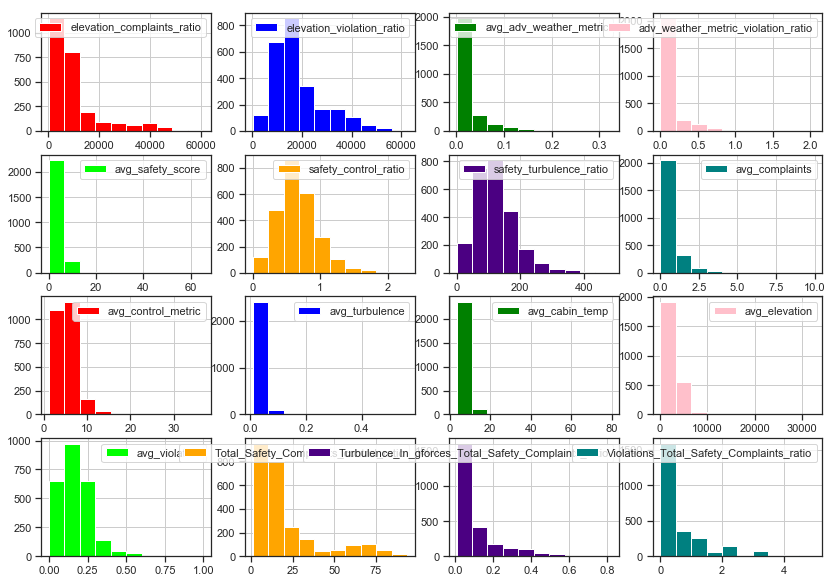

In [82]:
plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','indigo','teal',
    'red','blue','green','pink','lime','orange','indigo','teal']
cols = ['elevation_complaints_ratio', 'elevation_violation_ratio', 'avg_adv_weather_metric',
        'adv_weather_metric_violation_ratio', 'avg_safety_score', 'safety_control_ratio', 
        'safety_turbulence_ratio', 'avg_complaints', 'avg_control_metric', 'avg_turbulence', 
        'avg_cabin_temp', 'avg_elevation', 'avg_violation', 'Total_Safety_Complaints_control_ratio',
        'Turbulence_In_gforces_Total_Safety_Complaints_ratio', 'Violations_Total_Safety_Complaints_ratio']

for i,j in zip(range(1,17),cols):
    plt.subplot(4,4,i)
    test_for_prediction[j].hist(color = clr[i-1], label=j)
    plt.legend()

In [83]:
test_for_prediction.isnull().sum()

Safety_Score                                            0
Days_Since_Inspection                                   0
Total_Safety_Complaints                                 0
Control_Metric                                          0
Turbulence_In_gforces                                   0
Cabin_Temperature                                       0
Accident_Type_Code                                      0
Max_Elevation                                           0
Violations                                              0
Adverse_Weather_Metric                                  0
elevation_complaints_ratio                              0
elevation_violation_ratio                               0
avg_adv_weather_metric                                  0
adv_weather_metric_violation_ratio                      0
avg_safety_score                                        0
safety_control_ratio                                    0
safety_turbulence_ratio                                 0
avg_complaints

In [84]:
test_for_prediction['Violations_Total_Safety_Complaints_ratio'].fillna(test_for_prediction['Violations_Total_Safety_Complaints_ratio'].median(), inplace=True)

In [85]:
def num_conversion(x):
    if x == 0:
        return('Highly_Fatal_And_Damaging')
    elif x == 1:
        return('Minor_Damage_And_Injuries')
    elif x == 2:
        return('Significant_Damage_And_Fatalities')
    elif x == 3:
        return('Significant_Damage_And_Serious_Injuries')
    else:
        return('None')

In [86]:
test.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [87]:
#Predict "Accident_ID	Severity"

prediction_from_dt  = best_clf_dt.predict(test_for_prediction)
df_prediction_from_dt = pd.DataFrame({'Accident_ID':test.Accident_ID, 'Severity': prediction_from_dt})
df_prediction_from_dt['Severity'] = df_prediction_from_dt['Severity'].apply(num_conversion)
df_prediction_from_dt.to_csv("Final_output_prediction_from_dt.csv")

prediction_from_rf  = best_clf_rf.predict(test_for_prediction)
df_prediction_from_rf = pd.DataFrame({'Accident_ID':test.Accident_ID, 'Severity': prediction_from_rf})
df_prediction_from_rf['Severity'] = df_prediction_from_rf['Severity'].apply(num_conversion)
df_prediction_from_rf.to_csv("Final_output_prediction_from_rf.csv")
